# CREDIT CARD FRAUD DETECTION

# importing librarys

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

os.chdir('D:/$TUDY/Codsoft/fraudTest.csv/fraud.csv')

# Data Gathering 

In [3]:
train_data=pd.read_csv("fraudTrain.csv")
test_data=pd.read_csv("fraudTest.csv")

In [4]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/19 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/19 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01/01/19 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01/01/19 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01/01/19 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/20 12:14:00,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/20 12:14:00,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/20 12:14:00,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/20 12:15:00,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/20 12:15:00,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
train_data.shape

(1048575, 23)

In [9]:
test_data.shape

(555719, 23)

In [3]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

(None, None)

In [4]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,3.026977e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621435e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242870e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864305e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Data cleanings 

In [6]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

In [11]:
test_data.duplicated().sum()

0

In [12]:
for column_name in train_data.columns:
    unique_values = train_data[column_name].nunique()
    print(f'Unique values in column {column_name}: {unique_values}')


Unique values in column Unnamed: 0: 1048575
Unique values in column trans_date_trans_time: 476595
Unique values in column cc_num: 320
Unique values in column merchant: 693
Unique values in column category: 14
Unique values in column amt: 48602
Unique values in column first: 348
Unique values in column last: 479
Unique values in column gender: 2
Unique values in column street: 965
Unique values in column city: 879
Unique values in column state: 51
Unique values in column zip: 952
Unique values in column lat: 950
Unique values in column long: 951
Unique values in column city_pop: 865
Unique values in column job: 493
Unique values in column dob: 950
Unique values in column trans_num: 1048575
Unique values in column unix_time: 1030650
Unique values in column merch_lat: 1016437
Unique values in column merch_long: 1034825
Unique values in column is_fraud: 2


In [13]:
for column_name in test_data.columns:
    unique_values = test_data[column_name].nunique()
    print(f'Unique values in column {column_name}: {unique_values}')


Unique values in column Unnamed: 0: 555719
Unique values in column trans_date_trans_time: 226976
Unique values in column cc_num: 319
Unique values in column merchant: 693
Unique values in column category: 14
Unique values in column amt: 37256
Unique values in column first: 341
Unique values in column last: 471
Unique values in column gender: 2
Unique values in column street: 924
Unique values in column city: 849
Unique values in column state: 50
Unique values in column zip: 912
Unique values in column lat: 910
Unique values in column long: 910
Unique values in column city_pop: 835
Unique values in column job: 478
Unique values in column dob: 910
Unique values in column trans_num: 555719
Unique values in column unix_time: 544760
Unique values in column merch_lat: 546490
Unique values in column merch_long: 551770
Unique values in column is_fraud: 2


In [7]:
print(train_data['is_fraud'].value_counts())

is_fraud
0    1042569
1       6006
Name: count, dtype: int64


In [8]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data visualization & Exploration 

C:\Users\Admin\AppData\Local\Temp\ipykernel_8420\619643735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")


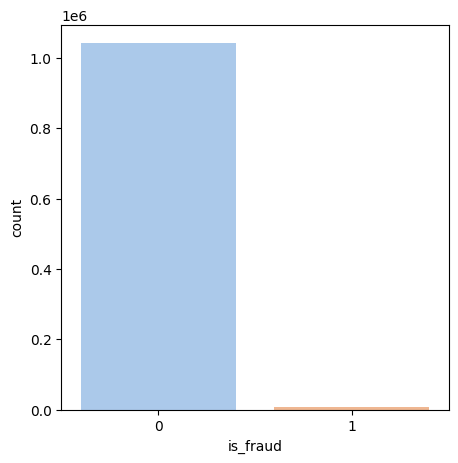

In [9]:
plt.figure(figsize=(5,5))
fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")
plt.show(fg)

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

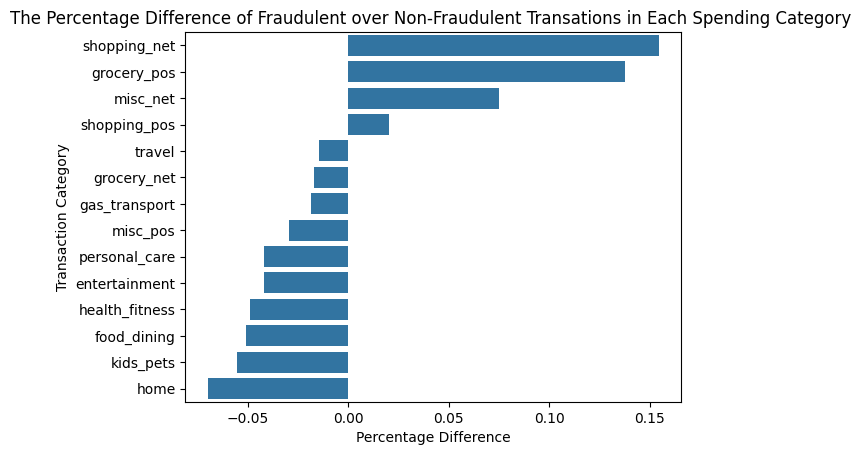

In [10]:
a=train_data[train_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_data[train_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

#Preprocessing
Handle Date Time

In [11]:
import pandas as pd

# Specify the datetime formats
trans_date_format = "%d-%m-%Y %H:%M"
dob_date_format = "%d-%m-%Y"

# Convert datetime columns for train_data
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"], format=trans_date_format)
train_data["dob"] = pd.to_datetime(train_data["dob"], format=dob_date_format)

# Convert datetime columns for test_data
test_data["trans_date_trans_time"] = pd.to_datetime(test_data["trans_date_trans_time"], format=trans_date_format)
test_data["dob"] = pd.to_datetime(test_data["dob"], format=dob_date_format)

# Display the DataFrames to verify changes
print(train_data)
print(test_data)


         Unnamed: 0 trans_date_trans_time        cc_num  \
0                 0   2019-01-01 00:00:00  2.703190e+15   
1                 1   2019-01-01 00:00:00  6.304230e+11   
2                 2   2019-01-01 00:00:00  3.885950e+13   
3                 3   2019-01-01 00:01:00  3.534090e+15   
4                 4   2019-01-01 00:03:00  3.755340e+14   
...             ...                   ...           ...   
1048570     1048570   2020-03-10 16:07:00  6.011980e+15   
1048571     1048571   2020-03-10 16:07:00  4.839040e+15   
1048572     1048572   2020-03-10 16:08:00  5.718440e+11   
1048573     1048573   2020-03-10 16:08:00  4.646850e+18   
1048574     1048574   2020-03-10 16:08:00  2.283740e+15   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   entertainment  220.11   
3      

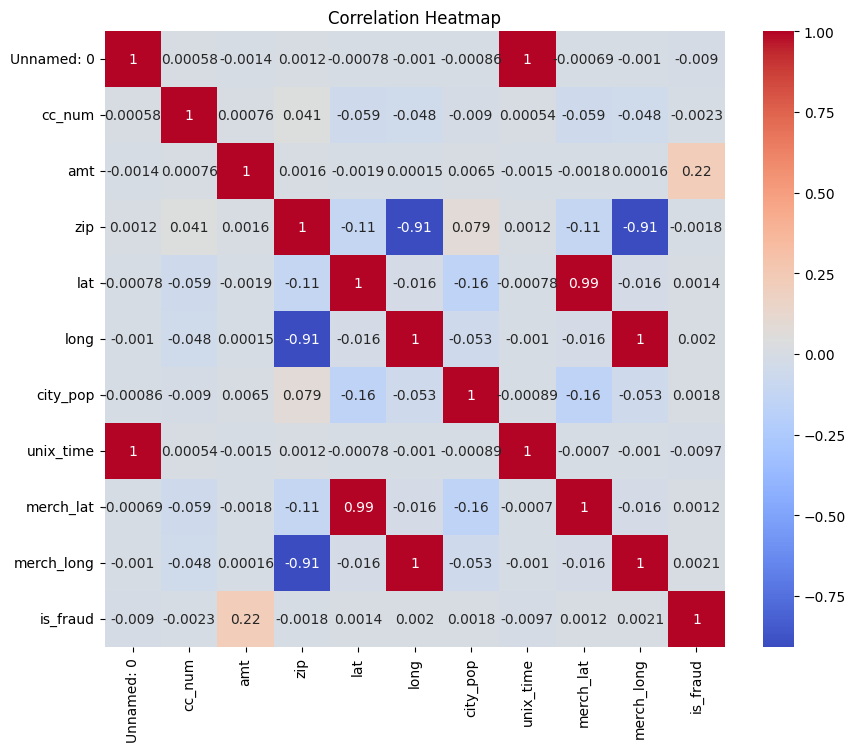

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure only numeric columns are used for correlation
numeric_columns = train_data.select_dtypes(include=['number']).columns
correlation_matrix = train_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
#drop columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','trans_num','unix_time',
               'first','last','street','zip','trans_date_trans_time','city',
               'lat','long','dob','merch_lat','merch_long','state']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

print(train_data)
train_data.shape

print(test_data.head(5))
test_data.shape


                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1048570                     fraud_Fadel Inc  health_fitness   77.00      F   
1048571    fraud_Cremin, Hamill and Reichel        misc_pos  116.94      F   
1048572  fraud_O'Connell, Botsford and Hand            home   21.27      F   
1048573              fraud_Thompson-Gleason  health_fitness    9.52      F   
1048574                 fraud_Buckridge PLC        misc_pos    6.81      F   

         city_pop                                job  is_fraud 

(555719, 7)

# Handle Data Imbalance

In [14]:
encoder = LabelEncoder()
train_data["gender"]=encoder.fit_transform(train_data["gender"])
test_data["gender"]=encoder.fit_transform(test_data["gender"])

train_data["category"]=encoder.fit_transform(train_data["category"])
test_data["category"]=encoder.fit_transform(test_data["category"])

train_data["job"]=encoder.fit_transform(train_data["job"])
test_data["job"]=encoder.fit_transform(test_data["job"])

train_data["merchant"]=encoder.fit_transform(train_data["merchant"])
test_data["merchant"]=encoder.fit_transform(test_data["merchant"])
# Assuming your DataFrame is named df
train_data['amt'] = train_data['amt'].astype(int)

# Fill missing values
train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)
test_data.fillna(-999,inplace=True)
test_data.fillna(-999,inplace=True)

# Drop rows containing -999 in train_data
train_data = train_data[train_data != -999].dropna()

# Drop rows containing -999 in test_data
test_data = test_data[test_data != -999].dropna()


# Split train and test data

In [15]:
x_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']

x_test=test_data.drop('is_fraud',axis=1)
y_test = test_data['is_fraud']

In [16]:
train_data.head(5)
test_data.head(5)

,merchant,category,amt,gender,city_pop,job,is_fraud
0,319,10,2.86,1,333497,275,0
1,591,10,29.84,0,302,392,0
2,611,5,41.28,0,34496,259,0
3,222,9,60.05,1,54767,407,0
4,292,13,3.19,1,1126,196,0


# 3-EDA

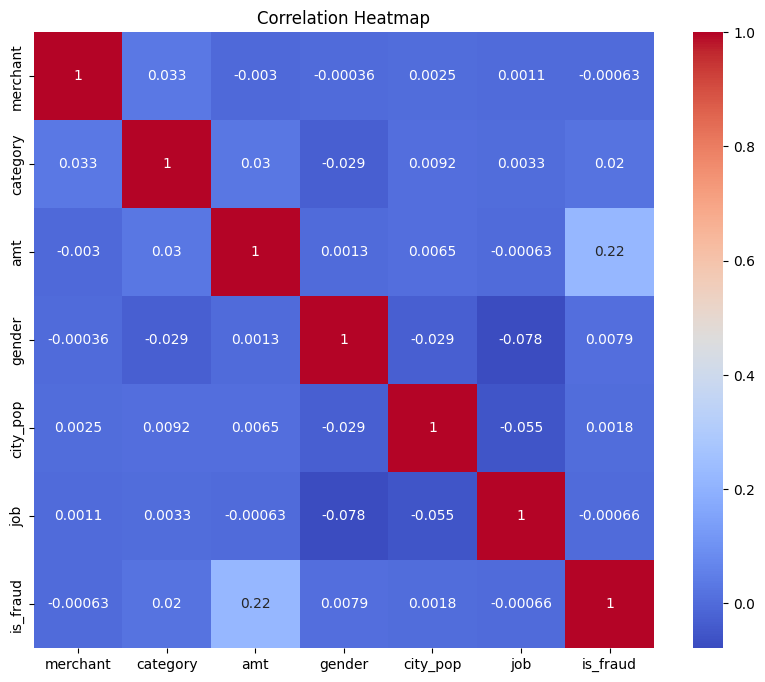

2
2


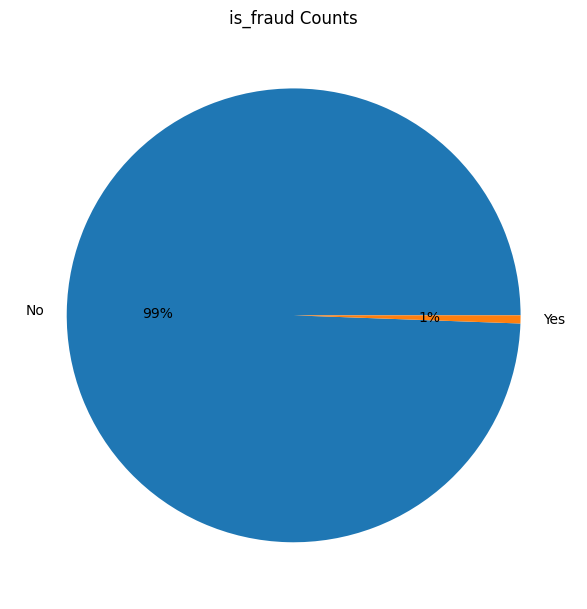

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure only numeric columns are used for correlation
numeric_columns = train_data.select_dtypes(include=['number']).columns
correlation_matrix = train_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plotting the pie chart for "is_fraud" counts
exit_counts = train_data["is_fraud"].value_counts()
labels = ["No", "Yes"]

print(len(exit_counts))
print(len(labels))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=labels, autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Random Forest

In [18]:
print(x_train.dtypes)
print(y_train.dtypes)

merchant    int32
category    int32
amt         int32
gender      int32
city_pop    int64
job         int32
dtype: object
int64


In [19]:
from sklearn.ensemble import RandomForestClassifier

cla=RandomForestClassifier(n_estimators=100,random_state=42)
cla.fit(x_train,y_train)

y_pred=cla.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.997610303048843
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.74      0.59      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.80      0.83    555719
weighted avg       1.00      1.00      1.00    555719



# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(random_state=42)
classification.fit(x_train,y_train)

y_pred=classification.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.9953123790980694
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.42      0.59      0.49      2145

    accuracy                           1.00    555719
   macro avg       0.71      0.79      0.74    555719
weighted avg       1.00      1.00      1.00    555719



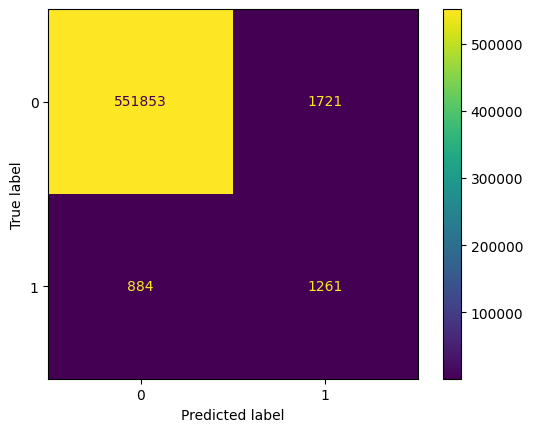

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

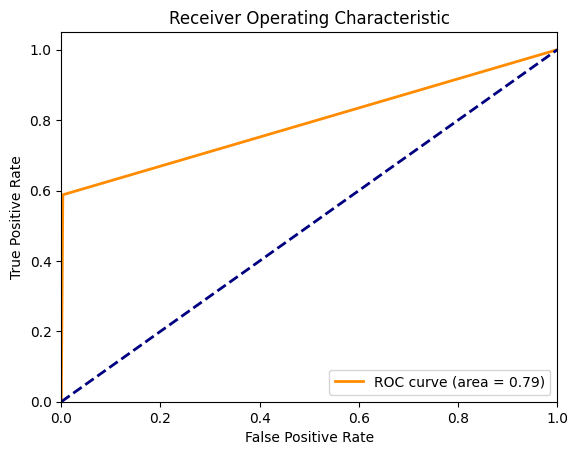

AUC: 0.7923849495471356


In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)
